In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file into the data frame
df = pd.read_csv("Uber Request Data.csv")
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [3]:
#shape of the data
df.shape

(6745, 6)

In [4]:
# drop the duplicate data if present
df.drop_duplicates(subset=["Request id"])

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
# Check the data types and information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
#check for null values
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Except "Driver id" and "Drop timestamp" all other columns doesn't have null values. 

In [7]:
df.isnull().sum()/df.shape[0]

Request id           0.000000
Pickup point         0.000000
Driver id            0.392884
Status               0.000000
Request timestamp    0.000000
Drop timestamp       0.580282
dtype: float64

From the above data 58% of the Drop timestamp is null values and 39 % of Driver id is missing. 
In this case it's not safe to impute missing values so we can drop those columns or not use these columns in analysis

In [8]:
#Checking values in Request id. All the values in the request id column is unique
len(df["Request id"].unique().tolist())

6745

In [9]:
#check the data available in Pickup point
df["Pickup point"].value_counts(normalize=True)

City       0.519941
Airport    0.480059
Name: Pickup point, dtype: float64

In [10]:
#check the data available in Status
df["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [11]:
#check the data available in Request timestamp
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
12/7/2016 21:42        5
                      ..
15-07-2016 18:08:33    1
15-07-2016 04:50:54    1
14-07-2016 18:42:23    1
13-07-2016 19:26:50    1
15-07-2016 23:55:03    1
Name: Request timestamp, Length: 5618, dtype: int64

In [12]:
#The values in Request timestamp is not in a standard format. Let's convert it to standard format
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"])

In [13]:
#Check the values present in Request timestamp to confirm values are in standard format
df["Request timestamp"].value_counts()

2016-11-07 19:02:00    6
2016-11-07 17:57:00    6
2016-11-07 08:37:00    6
2016-11-07 09:40:00    6
2016-12-07 21:42:00    5
                      ..
2016-07-15 18:08:33    1
2016-07-15 04:50:54    1
2016-07-14 18:42:23    1
2016-07-13 19:26:50    1
2016-07-15 23:55:03    1
Name: Request timestamp, Length: 5618, dtype: int64

In [14]:
#To understand the cars demand hourly let's extract hour from the "request timestamp" column by using lambda function
df["Request Hour"] = df["Request timestamp"].apply(lambda x:x.hour)

In [15]:
#To understand the cars demand day viz let's extract day from the "request timestamp" column by using lambda function
df["Request Day"] = df["Request timestamp"].apply(lambda x:x.day)

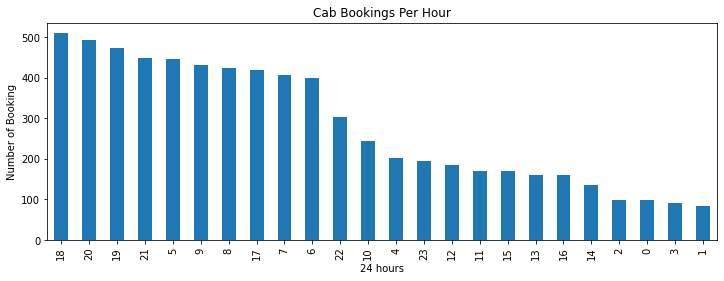

In [16]:
#We can analyse the hourly demand or pick ups of the cars by plotting the bar chart
plt.figure(figsize=(12,4))
df["Request Hour"].value_counts().plot.bar()
plt.title("Cab Bookings Per Hour")
plt.xlabel("24 hours")
plt.ylabel("Number of Booking")
plt.show()

From the above plot we can see that there is high demand for cars in the morning from 5AM to 9AM and 
in the evening from 5PM to 9 PM 

In [18]:
#We can analyse the day viz demand or pick ups of the cars 
df["Request Day"].value_counts()

7     2674
15    1381
14    1353
13    1337
Name: Request Day, dtype: int64

From the above data we cannot draw insights since we have only four days data

1.Visually identify the most pressing problems for Uber. 
Hint: Create plots to visualize the frequency of requests that get canceled or show 'no cars available'; identify the most problematic types of requests (city to airport/airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots

<Figure size 864x432 with 0 Axes>

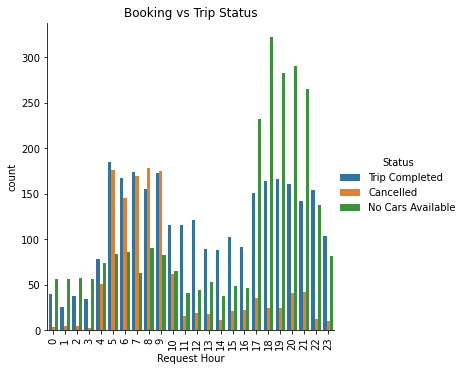

In [82]:
#We can plot Request Hour against status to check the demand suppy by checking which is the rush hour 
#and what's the status of request
plt.figure(figsize=(12,6))
sns.factorplot(x="Request Hour", hue="Status", data=df, kind="count")
plt.title("Booking vs Trip Status")
plt.xticks(rotation=90)
plt.show()

From the above plot 1)In the morning rush hours from 5AM to 9AM "Trips completed almost equal to number of trips cancelled"
                    2)In the day from 10 AM to 4PM Number of requests is comparitively less than morning and evening rush. 
                      Although "No cars available is more than cancelled trips"
                    3)In the evening and late hours from 5PM to 11PM "has highest No Cars available"

<Figure size 864x432 with 0 Axes>

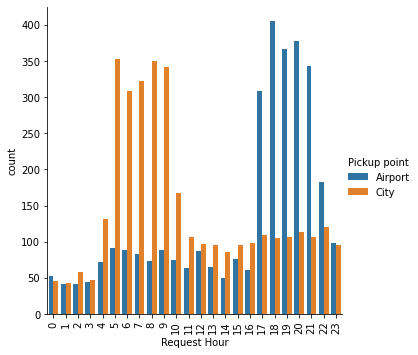

In [29]:
#Let's check whether demand from airport/city is more during the rush hours by plotting demans vs pickup point
plt.figure(figsize=(12,6))
sns.factorplot(x="Request Hour", hue="Pickup point", data=df, kind="count")
plt.xticks(rotation=90)
plt.show()

From the above plot 1)High number of the pick ups from "City" during morning rush hour from 5AM to 9AM
                    2)High Number of pick ups from "Airport" during the evening rush hour from 5PM to 10PM

2.Find out the gap between supply and demand and show the same using plots.
Find the time slots when the highest gap exists
Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

#Let's create the time slots by using 1) <5AM Pre Morning 
                                      2) greater than equal to 5AM and less than 10 AM as "Morning Rush"
                                      3) greater than equal to 10AM and less than 17PM as "Day Time"
                                      4) gretaer than equal to 17PM and less than 22PM as "Evening Rush"
                                      5) else "Late Evening"

In [31]:
#Create a time slot function
def time_slot(x):
    if x<5:
        return "Pre Morning"
    elif x>=5 and x<10:
        return "Morning Rush"
    elif x>=10 and x<17:
        return "Day Time"
    elif x>=17 and x<22:
        return "Evening Rush"
    else:
        return "Late Evening"

In [32]:
#Check the values in "request hour"
df["Request Hour"].head()

0    11
1    17
2     9
3    21
4     8
Name: Request Hour, dtype: int64

In [34]:
#Apply time slot function on request hour 
df["Time Slot"] = df["Request Hour"].apply(lambda x: time_slot(x))

In [35]:
#verify the data in time slot column
df["Time Slot"].head()

0        Day Time
1    Evening Rush
2    Morning Rush
3    Evening Rush
4    Morning Rush
Name: Time Slot, dtype: object

In [36]:
#Check the value counts of each time slot to understand the demand
df["Time Slot"].value_counts()

Evening Rush    2342
Morning Rush    2103
Day Time        1224
Pre Morning      578
Late Evening     498
Name: Time Slot, dtype: int64

<Figure size 1152x288 with 0 Axes>

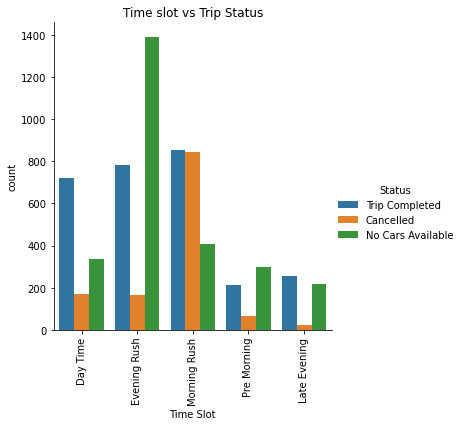

In [41]:
#Plot factor plot to understand the demand and supply by plotting time slot vs trip status
plt.figure(figsize=(16, 4))
sns.factorplot(x="Time Slot", hue="Status", data=df, kind="count")
plt.xticks(rotation=90)
plt.title("Time slot vs Trip Status")
plt.show()

From the above graph 1) In Evening Rush time slot there is a huge issue in the supply as there are "No Cars Available"
                     2) In Morning Rush time slot there is a equal number of trips "cancelled" and "completed"

<Figure size 864x432 with 0 Axes>

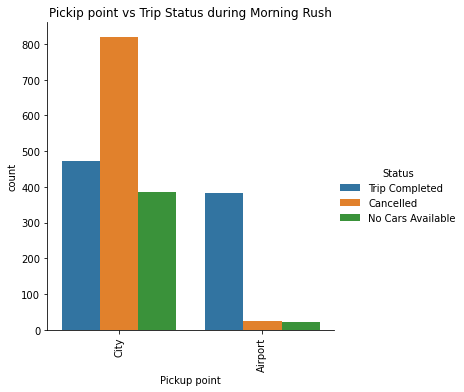

In [83]:
# as you can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot. 
#Let's check in which pickup point the trips are cancelled highes
temp_df = df[df["Time Slot"] == "Morning Rush"]
plt.figure(figsize=(12,6))
sns.factorplot(x="Pickup point", hue="Status", data=temp_df, kind="count")
plt.xticks(rotation=90)
plt.title("Pickip point vs Trip Status during Morning Rush")
plt.show()

From the above plot most of trips cancelled in "City" Pick up point

In [52]:
#Find the number of trips cancelled in the "Morning Rush" 
df.loc[(df["Time Slot"]=="Morning Rush") & (df["Status"] == "Cancelled")].shape[0]

843

In [53]:
#Find the number of trips cancelled in the "Morning Rush" in "City"
df.loc[(df["Time Slot"]=="Morning Rush") & (df["Status"] == "Cancelled") & (df["Pickup point"]=="City")].shape[0]

820

In [54]:
#Find the number of trips cancelled in the "Morning Rush" in "Airport"
df.loc[(df["Time Slot"]=="Morning Rush") & (df["Status"] == "Cancelled") & (df["Pickup point"]=="Airport")].shape[0]

23

<Figure size 864x432 with 0 Axes>

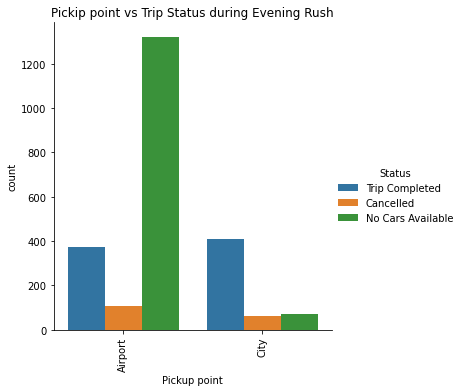

In [84]:
# let's look at the supply and demand in evening rush hour
temp_df = df[df["Time Slot"] == "Evening Rush"]
plt.figure(figsize=(12,6))
sns.factorplot(x="Pickup point", hue="Status", data=temp_df, kind="count")
plt.title("Pickip point vs Trip Status during Evening Rush")
plt.xticks(rotation=90)
plt.show()

From the above graph during Evening Rush Hour 1) Number of trips completed from "City" and "Airport" is almost same
                                              2) There is a huge supply issue in Airport

3. What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s).

In [56]:
#Number of trips completed in Evening Rush from "City"
df.loc[(df["Time Slot"]=="Evening Rush") & (df["Status"] == "Trip Completed") & (df["Pickup point"]=="City")].shape[0]

411

In [57]:
#Number of trips completed in Evening Rush from "Airport"
df.loc[(df["Time Slot"]=="Evening Rush") & (df["Status"] == "Trip Completed") & (df["Pickup point"]=="Airport")].shape[0]

373

In [58]:
#Number of trips cancelled in Evening Rush from "City"
df.loc[(df["Time Slot"]=="Evening Rush") & (df["Status"] == "Cancelled") & (df["Pickup point"]=="City")].shape[0]

60

In [59]:
#Number of trips cancelled in Evening Rush from "Airport"
df.loc[(df["Time Slot"]=="Evening Rush") & (df["Status"] == "Cancelled") & (df["Pickup point"]=="Airport")].shape[0]

106

In [60]:
#Number of trips ended with "No Cars Available" in Evening Rush from "City"
df.loc[(df["Time Slot"]=="Evening Rush") & (df["Status"] == "No Cars Available") & (df["Pickup point"]=="City")].shape[0]

71

In [61]:
#Number of trips ended with "No Cars Available" in Evening Rush from "Airport"
df.loc[(df["Time Slot"]=="Evening Rush") & (df["Status"] == "No Cars Available") & (df["Pickup point"]=="Airport")].shape[0]

1321

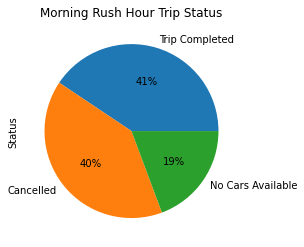

In [76]:
#Let's check the percentage of trip status in Morning Rush Hour
df_morning = df.loc[df["Time Slot"]=="Morning Rush"]
df_morning["Status"].value_counts().plot.pie(autopct='%0.0f%%')
plt.title("Morning Rush Hour Trip Status")
plt.show()

From the above plot in "Morning Rush Hour Trip Status" We can clearly see there is almost 40% of the Trips are Cancelled.

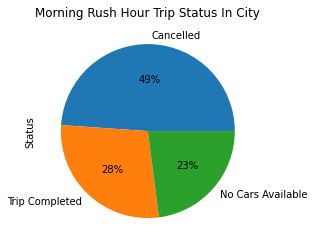

In [77]:
#Let's check the percentage of trip status in Morning Rush Hour in "City"
df_morning = df.loc[df["Time Slot"]=="Morning Rush"]
df_morning.loc[df_morning["Pickup point"]=="City"]["Status"].value_counts().plot.pie(autopct='%0.0f%%')
plt.title("Morning Rush Hour Trip Status In City")
plt.show()

In the Morning Rush Hour Most of the trips are Cancelled in the City Pick up point

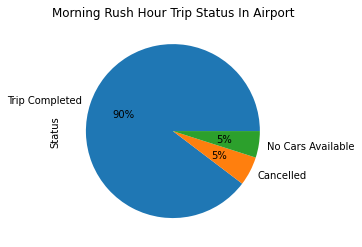

In [78]:
#Let's check the percentage of trip status in Morning Rush Hour in "Airport"
df_morning = df.loc[df["Time Slot"]=="Morning Rush"]
df_morning.loc[df_morning["Pickup point"]=="Airport"]["Status"].value_counts().plot.pie(autopct='%0.0f%%')
plt.title("Morning Rush Hour Trip Status In Airport")
plt.show()

From the above plots During Morning Rush Hour
1) The Cab service in the Airport is working seemlessly as 90% of trips are completed only 5% cabs are cancelled and only 5% No cars are available
2) Where as in the city almost 49% of trips are cancelled, 23% of cars are not available and only 28% of trips are completed
3) In the morning rush hour we should reduce the number of trips cancellation in city by increasing the car pooling making cabs available

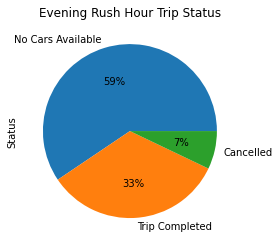

In [79]:
#Let's check the percentage of trip status in Evening Rush Hour
df_evening = df.loc[df["Time Slot"]=="Evening Rush"]
df_evening["Status"].value_counts().plot.pie(autopct='%0.0f%%')
plt.title("Evening Rush Hour Trip Status")
plt.show()

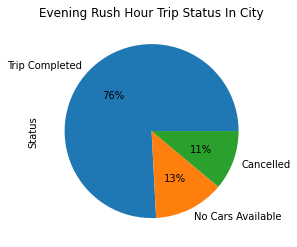

In [80]:
#Let's check the percentage of trip status in Evening Rush Hour in "City"
df_evening.loc[df_evening["Pickup point"]=="City"]["Status"].value_counts().plot.pie(autopct='%0.0f%%')
plt.title("Evening Rush Hour Trip Status In City")
plt.show()

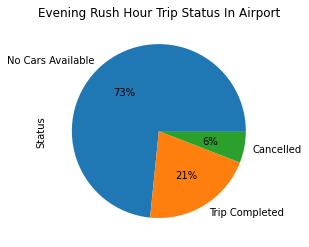

In [81]:
#Let's check the percentage of trip status in Morning Rush Hour in "Airport"
df_evening.loc[df_evening["Pickup point"]=="Airport"]["Status"].value_counts().plot.pie(autopct='%0.0f%%')
plt.title("Evening Rush Hour Trip Status In Airport")
plt.show()

From the above plots During Evening Rush Hour

1) The Cab service in the City is working comparitively better than the cities
2) In the Evening Rush in City Pick up point almost 76% of the trips are completed, 13% cars not available and 11% cancelled
3) In the Airport Pick up point 73% of cars not available. We should increase the car availability

4.Recommend some ways to resolve the supply-demand gap.

1. In Morning Rush We can increase the cars availability by providing car pooling and also we can decrease car cancellations in the cities by giving incentives to both cab drivers and users
2. In Evening Rush Hour there is almost 73% of no cars available in Airports we can decrease by making number of cars available by providing extra facilities to cab drivers like providing late evening fee
   